# Network blending in StyleGAN

Swapping layers between two models in StyleGAN gives some interesting results. You need a base model and a second model which has been fine-tuned from the base.

In [1]:
!git clone https://github.com/justinpinkney/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 257 (delta 5), reused 10 (delta 3), pack-reused 245
Receiving objects: 100% (257/257), 2.31 MiB | 32.39 MiB/s, done.
Resolving deltas: 100% (139/139), done.


In [2]:
%cd stylegan2

/content/stylegan2


In [3]:
%tensorflow_version 1.x
!pip install typer

TensorFlow 1.x selected.


Command line help for the blending function is below. Make sure that you specify either `--output-grid` to save an example image or `--output-pkl` to save the modified pkl. (Currently only the the Gs network is modified)

- low_res_pkl: Path, # Pickle file from which to take low res layers
- high_res_pkl: Path, # Pickle file from which to take high res layers
- resolution: int, # Resolution level at which to switch between models
- level: int  = 0, # Switch at Conv block 0 or 1?
- blend_width: Optional[float] = None, # None = hard switch, float = smooth switch (logistic) with given width
- output_grid: Optional[Path] = "blended.jpg", # Path of image file to save example grid (None = don't save)
- seed: int = 0, # seed for random grid
- output_pkl: Optional[Path] = None, # Output path of pickle (None = don't save)
- verbose: bool = False, # Print out the exact blending fraction

         

In [4]:
!python blend_models.py --help

Usage: blend_models.py [OPTIONS] LOW_RES_PKL
                       HIGH_RES_PKL RESOLUTION

Arguments:
  LOW_RES_PKL   [required]
  HIGH_RES_PKL  [required]
  RESOLUTION    [required]

Options:
  --level INTEGER                 [default: 0]
  --blend-width FLOAT
  --output-grid PATH              [default:
                                  blended.jpg]

  --seed INTEGER                  [default: 0]
  --output-pkl PATH
  --verbose / --no-verbose        [default: False]
  --install-completion [bash|zsh|fish|powershell|pwsh]
                                  Install
                                  completion for
                                  the specified
                                  shell.

  --show-completion [bash|zsh|fish|powershell|pwsh]
                                  Show completion
                                  for the
                                  specified shell,
                                  to copy it or
                                  customize the

Use as an example a model I fine-tuned at 256 from FFHQ to data scraped from NASA DSCOVR:EPIC satellite (https://epic.gsfc.nasa.gov/).

For the output of the fine-tuned model see the tweet below (https://twitter.com/Buntworthy/status/1295445259971899393)

I'm actually going to use a model from earlier in training than the result shown in the tweet, this makes the blending a bit nicer.

In [5]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Not sure what I was expecting, but definitely forgot to turn mirror augmentation off. <a href="https://t.co/qO5ySH2TxT">pic.twitter.com/qO5ySH2TxT</a></p>&mdash; Justin (@Buntworthy) <a href="https://twitter.com/Buntworthy/status/1295445259971899393?ref_src=twsrc%5Etfw">August 17, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

In [6]:
 !gdown https://drive.google.com/uc?id=1-p0zIkWPXjcwYZ6tPw_kNjn4e1gD2lnz
 !wget https://hanlab.mit.edu/projects/data-efficient-gans/models/stylegan2-ffhq.pkl

Downloading...
From: https://drive.google.com/uc?id=1-p0zIkWPXjcwYZ6tPw_kNjn4e1gD2lnz
To: /content/stylegan2/epic-slim-256-000040.pkl
296MB [00:01, 163MB/s]
--2020-08-23 06:54:58--  https://hanlab.mit.edu/projects/data-efficient-gans/models/stylegan2-ffhq.pkl
Resolving hanlab.mit.edu (hanlab.mit.edu)... 18.25.8.36
Connecting to hanlab.mit.edu (hanlab.mit.edu)|18.25.8.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295721852 (282M)
Saving to: ‘stylegan2-ffhq.pkl’

stylegan2-ffhq.pkl  100%[===================>] 282.02M  40.7MB/s    in 7.4s    

2020-08-23 06:55:06 (38.2 MB/s) - ‘stylegan2-ffhq.pkl’ saved [295721852/295721852]



In [7]:
from IPython.display import Image 

Time to try out a bunch of different resolutions for the switch and display the results. Remember the earth model provides the low-resolution layers, i.e. the "structure", and the original faces model the high-resolution, i.e. the "texture"

I'm going to run the main function in blend_models.py in a python loop, but you can also run it from the command line, something like

`python blend_models.py epic-slim-256-000040.pkl stylegan2-ffhq.pkl 64 --output-grid "blended.jpg"`

blending at 8x8


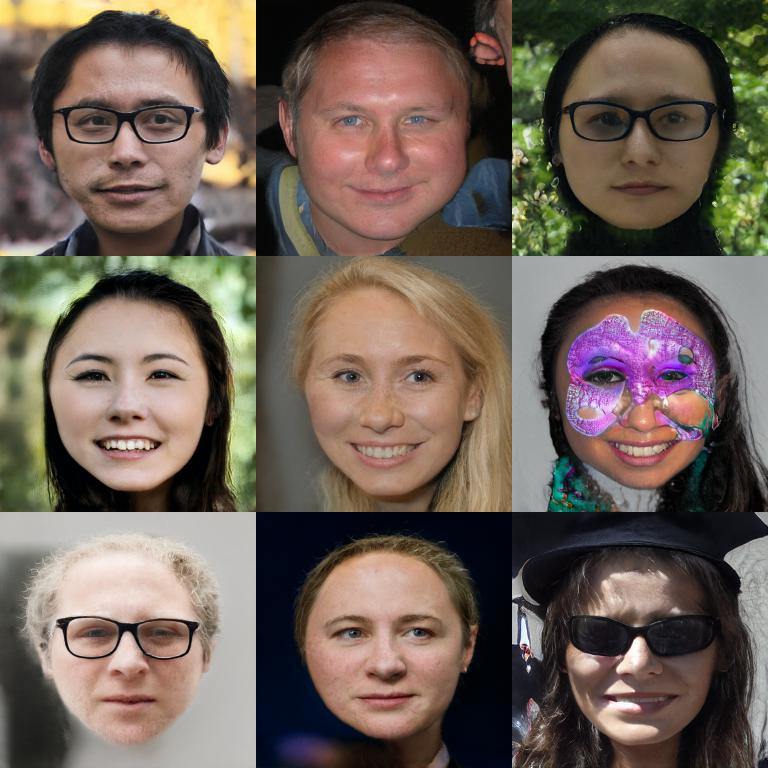

blending at 16x16


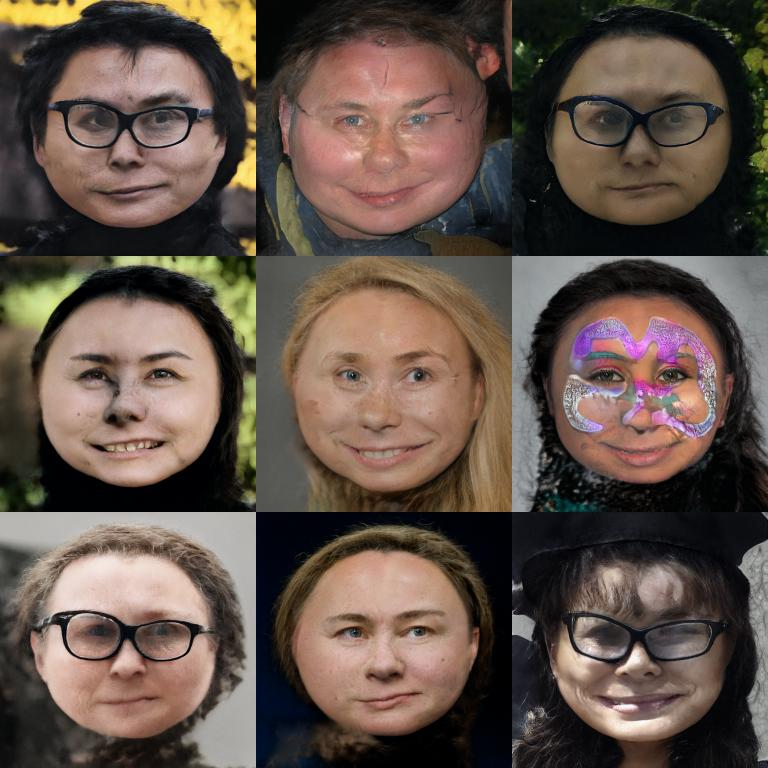

blending at 32x32


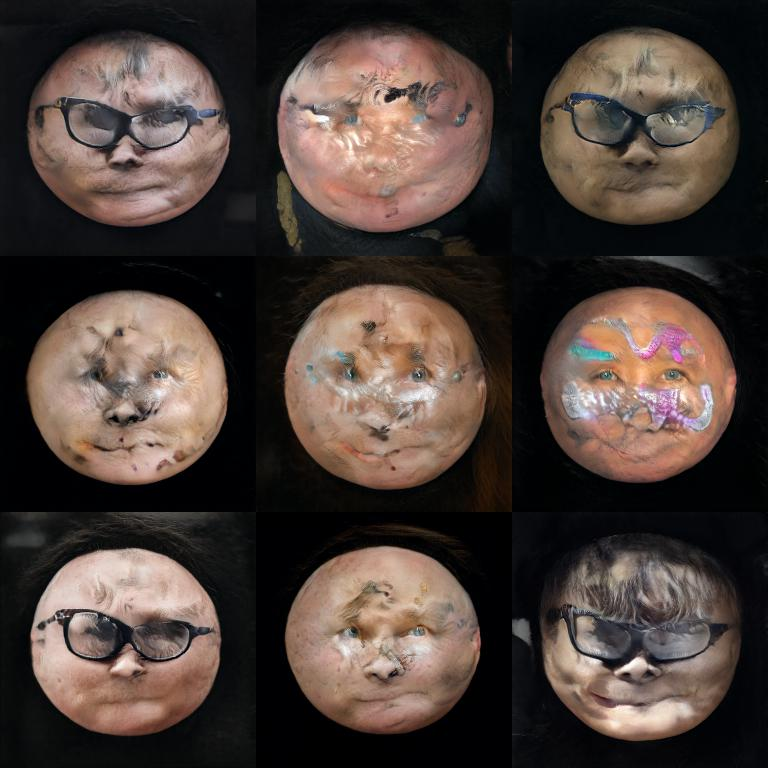

blending at 64x64


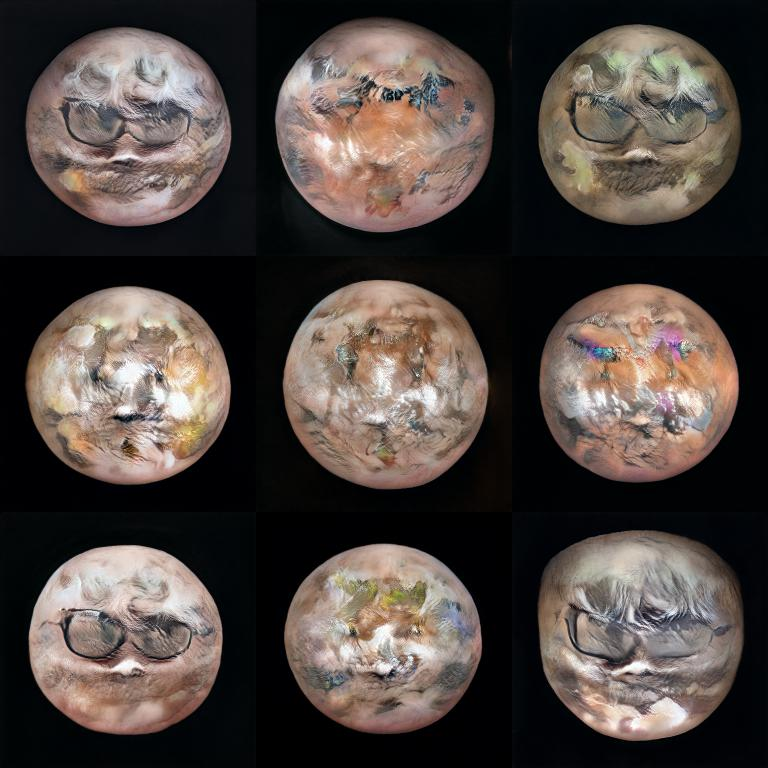

blending at 128x128


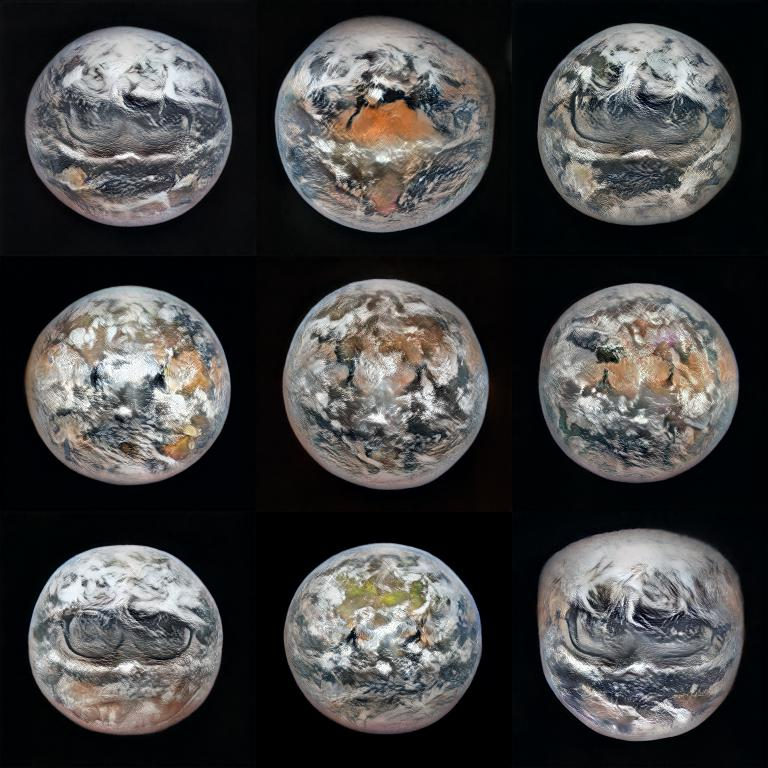

In [9]:
import blend_models

resolutions = (8, 16, 32, 64, 128)
for res in resolutions:
  filename = f"blended-{res}.jpg"
  blend_models.main("epic-slim-256-000040.pkl", "stylegan2-ffhq.pkl", res, output_grid=filename)
  img = Image(filename=filename)
  print(f"blending at {res}x{res}")
  display(img)

In [ ]:
!python blend_models epic-slim-256-000040.pkl stylegan2-ffhq.pkl 32 --output-pkl="blended.pkl"